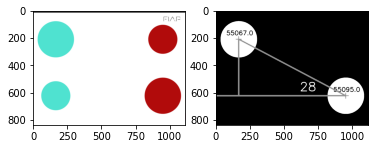

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

img = cv2.imread('circulo.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_hsv = np.array([0, 50, 100])  
image_upper_hsv = np.array([100, 255, 255])

for y in range(0, img_rgb.shape[0]):
  for x in range(0, img_rgb.shape[1]):
    if y >= 450 and y <= 800 and x >= 0 and x <= 300:
      if img_hsv[y,x,0] < 100:
        img_hsv[y,x] = 0
    if y >= 50 and y <= 350 and x >= 650 and x <= 1100:
      if img_hsv[y,x,0] < 250:
        img_hsv[y,x] = 0

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)
contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

# Marcação na primeira bolinha
cnt1 = contornos[1]
M = cv2.moments(cnt1)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cv2.line(mask_hsv,(cx - 20,cy),(cx + 20,cy),(128,128,0),5)
cv2.line(mask_hsv,(cx,cy - 20),(cx, cy + 20),(128,128,0),5)
cv2.putText(mask_hsv, str(cv2.contourArea(contornos[1])), (cx-90,cy-30), cv2.FONT_HERSHEY_SIMPLEX,1.5,(0,0,0),4,cv2.LINE_AA)

# Marcação na segunda bolinha
cnt2 = contornos[0]
M = cv2.moments(cnt2)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
cv2.line(mask_hsv,(cx - 20,cy),(cx + 20,cy),(128,128,0),5)
cv2.line(mask_hsv,(cx,cy - 20),(cx, cy + 20),(128,128,0),5)
area = cv2.contourArea(contornos[0])
cv2.putText(mask_hsv, str(area), (cx-90,cy-30), cv2.FONT_HERSHEY_SIMPLEX,1.5,(0,0,0),4,cv2.LINE_AA)

#Fazer linha entre as duas bolinhas
cv2.line(mask_hsv, (165, 206),(945, 620),(125,0,0),10)
#linha horizontal da segunda bolinha
cv2.line(mask_hsv,(945,620),(0,620),(125,0,0),10)
# Formar tringulo retangulo - vertical
cv2.line(mask_hsv,(165,206),(165, 620),(125,0,0),10)

# Calcular ângulo
def pegarAngulo():
  Dy = 620-206
  Dx = 945-165
  angle = math.atan2(Dy, Dx)
  angD = round(math.degrees(angle))
  cv2.putText(mask_hsv, str(angD), (610,585), cv2.FONT_HERSHEY_SIMPLEX,3,(255,0,0),4,cv2.LINE_AA)

pegarAngulo()


plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(mask_hsv, cmap="Greys_r", vmin=0, vmax=255)
plt.show()
mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)